<a href="https://colab.research.google.com/github/art-lmk/EPL-Matches-prediction-with-XGBoost-Algorithm/blob/main/XGBoost_Algorithm(EPL_Prediction_between_2_matches).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# 1. Import necessary libraries
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np   # For numerical operations and arrays
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating statistical graphics (built on matplotlib)
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding labels and scaling features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
from xgboost import XGBClassifier  # The XGBoost classification algorithm
import warnings  # To handle warning messages
warnings.filterwarnings('ignore')  # Ignore warnings to keep output clean

In [34]:
# 2. Set random seed for reproducibility
np.random.seed(42)  # Ensures that random operations give the same results every time

In [35]:
# 3. Load your dataset
df = pd.read_csv('epl_final.csv')  # Reads the CSV file into a pandas DataFrame


In [50]:
# 4. Display basic information about the dataset
df.shape  # Shows number of rows and columns
df.head()  # Displays the first 5 rows of the DataFrame
df.columns.tolist()  # Prints all column names
#df.dtypes  # Shows the data type of each column
#df.isnull().sum()  # Counts missing values in each column

['Season',
 'MatchDate',
 'HomeTeam',
 'AwayTeam',
 'FullTimeHomeGoals',
 'FullTimeAwayGoals',
 'FullTimeResult',
 'HalfTimeHomeGoals',
 'HalfTimeAwayGoals',
 'HalfTimeResult',
 'HomeShots',
 'AwayShots',
 'HomeShotsOnTarget',
 'AwayShotsOnTarget',
 'HomeCorners',
 'AwayCorners',
 'HomeFouls',
 'AwayFouls',
 'HomeYellowCards',
 'AwayYellowCards',
 'HomeRedCards',
 'AwayRedCards']

In [41]:
# Identify what you want to predict
target='FullTimeResult'

In [43]:
# 6. Check the distribution of the target variable
print(f"\nDistribution of {target}:")
print(df[target].value_counts())  # Counts occurrences of each result type


Distribution of FullTimeResult:
FullTimeResult
H    4299
A    2768
D    2313
Name: count, dtype: int64


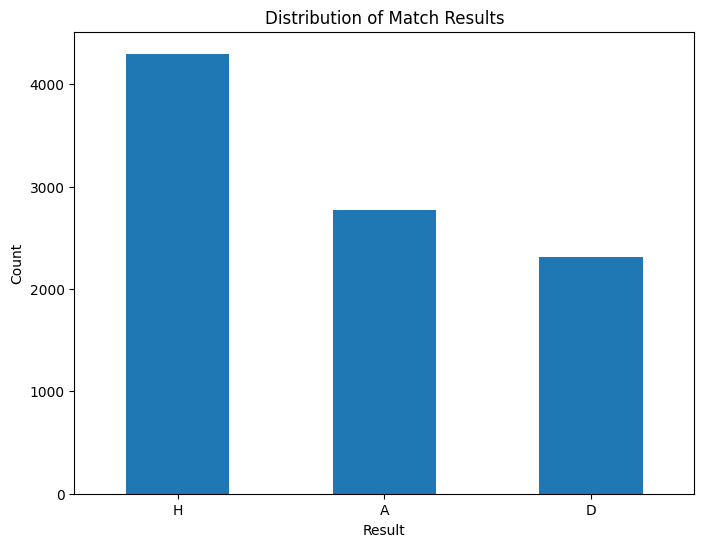

In [48]:
# 7. Visualize the target distribution
plt.figure(figsize=(8, 6))  # Creates a figure with specified size (width, height)
df[target].value_counts().plot(kind='bar')  # Creates a bar chart of result counts
plt.title('Distribution of Match Results')  # Adds a title to the plot
plt.xlabel('Result')  # Adds label to x-axis
plt.ylabel('Count')  # Adds label to y-axis
plt.xticks(rotation=0)  # Keeps x-axis labels horizontal
plt.show()  # Displays the plot

In [ ]:
features=['HomeTeam','AwayTeam','HomeGoalsAvg','AwayGoalsAvg']